# PERCEPTRON
Our model describe a linear classifier that divides the coordinate plane into two halves,
the line in the example is y=x.
We want to learn a parameter vector such that our model make the right prediction.
This model is called a linear perceptron.
The cost function minimize the distance in the two norm.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot

In [2]:
def sigmoid(t): return (1-np.exp(-t))/(1+np.exp(-t))
def neuron(w,b,x):return sigmoid(np.inner(w,x)+b)

In [3]:
#Train the neuron with some good data
data = np.array([[[1,1.5],+1],
       [[3,4],+1],
       [[4,3],-1],
       [[1.5,1],-1]])
print(data[0,0])
print(data[1,0])
dataset = np.random.randn(100,2) #random distribution of normal distributed points

[1, 1.5]
[3, 4]


In [4]:
def cost(teta):
    w=teta[0:2]
    b=teta[2]
    c=0
    for k in range(len(data)):
        c +=(neuron(w,b,data[k,0])-data[k,1])**2#error between the computed output and the real output
    return c

In [5]:
x0 = np.array([1.,1.,1.]);
opt = scipy.optimize.minimize(cost,x0);
print(opt.x)
print(opt.message)

[-14.4383797   14.66288882  -0.07286721]
Optimization terminated successfully.


In [6]:
def neuronopt(x): return neuron(opt.x[0:2],opt.x[2],x);
neuronopt([2,1])

-0.9999987515293466

In [7]:
datatest1 = np.array([p for p in dataset if neuronopt(p)>0])
datatest2 = np.array([p for p in dataset if neuronopt(p)<=0])


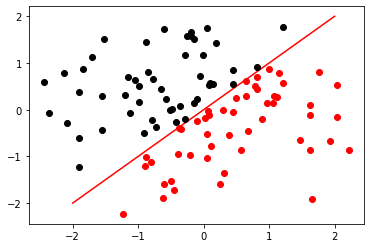

In [8]:
matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1[::,0], datatest1[::,1],'ko',  datatest2[::,0], datatest2[::,1],'ro');

In [9]:
import numpy as np
def steep_desc(w,eps,tol,data):
    (n,m)=data.shape
    (n1) = w.shape
    w31 = np.copy(w)
    w1 = w31[0:2]
    b1 = w31[2]
    nitmax = 60000
    err=1
    nit=0
    while err > tol and nit < nitmax:
        nit=nit+1
        w30 = np.copy(w31)
        w0 = np.copy(w1)
        b0 = np.copy(b1)
        w1 = np.copy(w0)
        b1 = np.copy(b0)
        for k in range(n):
            yk = neuron(w0,b0,data[k,0]) 
            w1 = w1 - eps*(yk-data[k,1])*np.asarray(data[k,0])*(1-yk**2)/2.0
            b1 = b1 - eps*(yk-data[k,1])*(1-yk**2)/2.0
        w31[0:2] = w1
        w31[2] = b1
        err =  np.max(abs(w31-w30)/(1+abs(w30)))
      
    print('nit',nit,err,w1,b1)
    return w31  

In [14]:
x0 = np.array([-10.,10.,1.]);
opt = scipy.optimize.minimize(cost,x0);
print(opt.x)
print(opt.message)
print(opt.nit,opt.fun)
optw = steep_desc(x0,0.11, 5e-6,data)
print(optw,cost(optw))

[-22.6435791   20.02321537  -0.07535091]
Optimization terminated successfully.
26 1.7660808701809633e-06
nit 6009 4.998653901187217e-06 [-10.34710501   9.8160513 ] 0.7875534797707282
[-10.34710501   9.8160513    0.78755348] 0.0003405242362576166


In [11]:
def neuronoptw(x): return neuron(optw[0:2],optw[2],x);

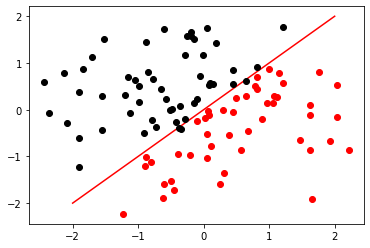

In [12]:
datatest1w = np.array([p for p in dataset if neuronoptw(p)>0])
datatest2w = np.array([p for p in dataset if neuronoptw(p)<0])
matplotlib.pyplot.plot([-2,2],[-2,2],'r', datatest1w[::,0], datatest1w[::,1],'ko',  datatest2w[::,0], datatest2w[::,1],'ro');

Exercise: Implement the backtraking approach for the comoputation of the step-length at each iteration of the line search method that uses the steepest direction. Compare the results with the method that uses a constant value of the step-length.